# Experiment prediction for transfer learning

In [1]:
import gym
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

import baby.envs
from baby.envs.baby_env import default_conf

In [2]:
# Create env
env = gym.make('baby-v0')

In [3]:
env.reset()

array([[[0.67657011, 0.57600754, 0.67332337, ..., 0.24240227,
         0.23858424, 1.        ],
        [0.59290923, 0.41079636, 0.60503964, ..., 0.27560987,
         0.30307511, 1.        ],
        [0.54990147, 0.28380033, 0.49064851, ..., 0.41058835,
         0.33293508, 1.        ],
        ...,
        [0.55652337, 0.5178497 , 0.51376602, ..., 0.30071923,
         0.76058263, 1.        ],
        [0.63792982, 0.59439694, 0.54788089, ..., 0.39374987,
         0.91390293, 1.        ],
        [0.71840076, 0.63934409, 0.51190224, ..., 0.39281085,
         0.84938355, 1.        ]],

       [[0.58321968, 0.5282249 , 0.62633176, ..., 0.24802823,
         0.25317025, 1.        ],
        [0.54708073, 0.38077507, 0.58634651, ..., 0.35639134,
         0.28171905, 1.        ],
        [0.53382003, 0.28839504, 0.51464783, ..., 0.55039891,
         0.23870706, 1.        ],
        ...,
        [0.49798636, 0.50583733, 0.40187547, ..., 0.3266653 ,
         0.80506448, 1.        ],
        [0.5

In [4]:
ground_truth = env.ground_truth
ground_truth.shape

(9, 21, 1000)

In [5]:
frame = ground_truth[:,:,0]

In [6]:
small_f = np.identity(3)
small_f[0]

m = np.einsum('ij,kl->ijkl',frame,small_f)

In [7]:
m.shape

(9, 21, 3, 3)

In [8]:
m[:,:,1,1]

array([[0.62146259, 0.61270167, 0.57552063, 0.5074372 , 0.47852954,
        0.51151005, 0.59721652, 0.67788036, 0.65578274, 0.59373501,
        0.59811948, 0.57431291, 0.54205446, 0.48406234, 0.36280515,
        0.30307051, 0.40962387, 0.61170933, 0.70676585, 0.72491966,
        0.75546457],
       [0.59247715, 0.55595083, 0.53768065, 0.48330176, 0.43032068,
        0.44387329, 0.52709704, 0.58360622, 0.56776029, 0.56014841,
        0.57998575, 0.51355284, 0.43153139, 0.39601759, 0.39090821,
        0.39790777, 0.46374661, 0.55776915, 0.56428557, 0.55027808,
        0.59106122],
       [0.4753873 , 0.44448358, 0.4834725 , 0.47634521, 0.40897974,
        0.39801055, 0.45557369, 0.51877449, 0.54661863, 0.58539421,
        0.58434157, 0.45753562, 0.33034763, 0.31280682, 0.36507276,
        0.38738907, 0.40596466, 0.42271947, 0.39990323, 0.40964342,
        0.49094769],
       [0.3779858 , 0.37267982, 0.4330578 , 0.46412317, 0.45640953,
        0.46941895, 0.4845355 , 0.52887092, 0.5634854

In [9]:
frame

array([[0.62146259, 0.61270167, 0.57552063, 0.5074372 , 0.47852954,
        0.51151005, 0.59721652, 0.67788036, 0.65578274, 0.59373501,
        0.59811948, 0.57431291, 0.54205446, 0.48406234, 0.36280515,
        0.30307051, 0.40962387, 0.61170933, 0.70676585, 0.72491966,
        0.75546457],
       [0.59247715, 0.55595083, 0.53768065, 0.48330176, 0.43032068,
        0.44387329, 0.52709704, 0.58360622, 0.56776029, 0.56014841,
        0.57998575, 0.51355284, 0.43153139, 0.39601759, 0.39090821,
        0.39790777, 0.46374661, 0.55776915, 0.56428557, 0.55027808,
        0.59106122],
       [0.4753873 , 0.44448358, 0.4834725 , 0.47634521, 0.40897974,
        0.39801055, 0.45557369, 0.51877449, 0.54661863, 0.58539421,
        0.58434157, 0.45753562, 0.33034763, 0.31280682, 0.36507276,
        0.38738907, 0.40596466, 0.42271947, 0.39990323, 0.40964342,
        0.49094769],
       [0.3779858 , 0.37267982, 0.4330578 , 0.46412317, 0.45640953,
        0.46941895, 0.4845355 , 0.52887092, 0.5634854

In [10]:
frame.shape

(9, 21)

In [11]:
np.gcd(frame.shape[0], frame.shape[1])

3

In [12]:
from scipy.ndimage.filters import gaussian_filter

In [13]:
m=np.random.rand(6,6)

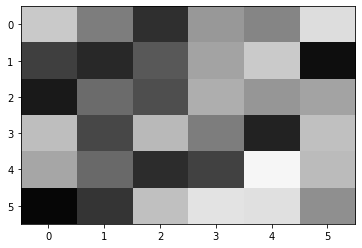

In [14]:
plt.imshow(m, cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

mean abs 0.07968267995123142


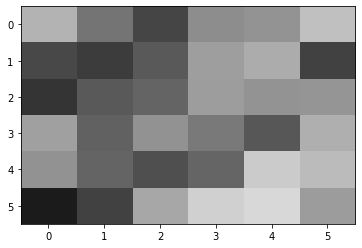

In [15]:
m_gauss = gaussian_filter(m, sigma=0.5, order=0)
print(f"mean abs {np.mean(np.abs(m-m_gauss))}")


plt.imshow(m_gauss, cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

Gaussian filter lasts for 0.0002684593200683594 seconds // mean abs 0.07968267995123142


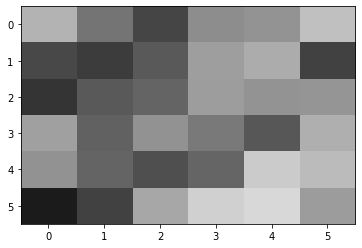

In [16]:
t=time.time()
m_gauss = gaussian_filter(m, sigma=0.5)
dt = time.time()-t

print(f"Gaussian filter lasts for {dt} seconds // mean abs {np.mean(np.abs(m-m_gauss))}")

plt.imshow(m_gauss, cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

In [17]:
def brute_gaussian(m, sigma: int = 2):
    shape = m.shape
    kernel = np.ones((sigma,sigma))
    pad = int(kernel.shape[0] / 2)
    
    print(kernel)
        
    m_ext = np.pad(m, pad_width=kernel.shape)
    m_res = np.copy(m)
    
    for i in range(shape[0]):        
        for j in range(shape[1]):
            ip = i+pad
            jp = j+pad
            
            m_blur = m_ext[ip-pad:ip+pad, jp-pad:jp+pad]
            
            print(m_blur)
            print(kernel)
            
            m_blur *= kernel
            print(f"{m_res[i,j]} ======> {np.mean(m_blur)}")
            m_res[i, j] = np.mean(m_blur)
            
            break
        break
            
    return m_res


[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
0.7867181562619641 ======> 0.0
brute lasts for 0.0031642913818359375 seconds


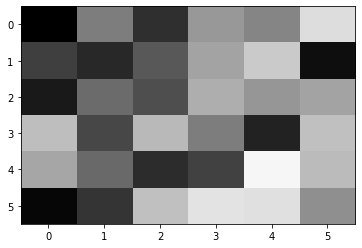

In [18]:
t=time.time()
brt = brute_gaussian(m)
dt = time.time()-t

print(f"brute lasts for {dt} seconds")

plt.imshow(brt, cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

In [19]:
np.mean(np.abs(brt-m))

0.02185328211838789

# Trial of n-gaussian filter with sigma related to value
Since it's difficult to formulate an all-in-one formulae,
try to execute multiple gaussian filter on small matrix subset by applying a filter 
with a specific sigma depending on the area mean value

In [20]:
origin_m = env.ground_truth[:,:,10]

In [21]:
def sigma_v(v, gamma, mu=0.5, sigma=0.3):
    return gamma * np.exp(-(v-mu)**2/(2*sigma**2))

def n_gaussian_filter(m, ni, nj, sigma_v_func, gamma):
    im = int(np.ceil(m.shape[0]/ni))
    jm = int(np.ceil(m.shape[1]/nj))
        
    out_m = np.copy(m)
    
    for i in range(im):
        for j in range(jm):
            sub_m = out_m[i*ni:(i+1)*ni, j*nj:(j+1)*nj]
            mean_sub_m = np.mean(sub_m)
            
            sub_m = gaussian_filter(sub_m, sigma=sigma_v_func(mean_sub_m, gamma))
            
            out_m[i*ni:(i+1)*ni, j*nj:(j+1)*nj] = sub_m
            
    return out_m

Duration n-gaussian-filter method = 0.009173154830932617 seconds


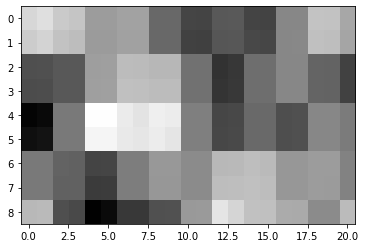

In [22]:
t=time.time()
m_ngauss = n_gaussian_filter(origin_m, ni=2, nj=2, sigma_v_func=sigma_v, gamma=2.0)
dt = time.time() - t

print(f"Duration n-gaussian-filter method = {dt} seconds")
plt.imshow(m_ngauss, cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

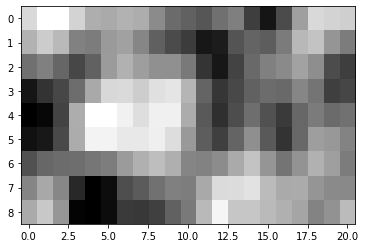

In [23]:
plt.imshow(origin_m, cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

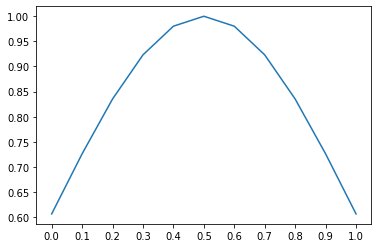

In [39]:
x=np.arange(start=0, stop=1.1, step=0.1)
mu=0.5
sigma=0.5
gamma=1.0
plt.plot(x, gamma * np.exp(-(x-mu)**2/(2*sigma**2)))
plt.xticks(x)
plt.show()

In [25]:
np.sqrt(0)

0.0